# Transfer Learning

**Install Kggle to download Dataset **

In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!kaggle competitions download -c 'histopathologic-cancer-detection'

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!mkdir train
!unzip train.zip -d train

Archive:  train.zip
  inflating: train/019ce31cc317087ca287f66ad757776952826594.tif  
  inflating: train/99f0b2fd7abb1d17ba4358063caa021e5f3595ad.tif  
  inflating: train/39d4fd1e3a7692de85b84411930e526ffca9519f.tif  
  inflating: train/bedeb8cea1da8d4f806085b59b2f729e79410294.tif  
  inflating: train/8f1569e1140f8d321ad2600d47f47072f09ca0e0.tif  
  inflating: train/840b2805976c4f61acd159e28a74f80c0f6b82e1.tif  
  inflating: train/9e20b8e0e48cdfcfb1e52d705d5f3c347dffbf33.tif  
  inflating: train/8a08b1ee79d0c0b258ac5c1feaa9f3b1afb359a6.tif  
  inflating: train/61ba3f85204590aad295afac3d31c04d5a17a1b6.tif  
  inflating: train/08ba4b90b4078e8b8b9ef0dce770f6ce0e537798.tif  
  inflating: train/61a89e42ed5ba2a1554f9e6a0cbfc8d171480b18.tif  
  inflating: train/f88732b237f128f224ebc8cc3bfe9dfd52f28aed.tif  
  inflating: train/72176048facc3347eae3482bd2b32b002cc6bc89.tif  
  inflating: train/b434aabead51af209a7ee72648a794b82845a77f.tif  
  inflating: train/009e2a357597b732a9ce1f4f247fa0e8af4d7

In [0]:
!ls /content/train | wc -l

220025


In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('/content/train_labels.csv.zip')
data.shape

(220025, 2)

In [0]:
# !pip install seaborn
# !pip install cv2
# !pip install torch

  Could not find a version that satisfies the requirement cv2 (from versions: )
No matching distribution found for cv2
    23% |███████▌                        | 138.8MB 29.8MB/s eta 0:00:16
Operation cancelled by user


In [0]:
# !apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [0]:
# !pip install torchvision

In [0]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import os
# import cv2
# import matplotlib.pyplot as plt
# import matplotlib.style as style
# style.use('fivethirtyeight')

# %matplotlib inline

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score
# import torch
# from torch.utils.data import TensorDataset, DataLoader,Dataset
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision
# import torchvision.transforms as transforms
# import torch.optim as optim
# from torch.optim import lr_scheduler
# import time 
# import tqdm
# from PIL import Image
# train_on_gpu = True
# from torch.utils.data.sampler import SubsetRandomSampler
# from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, CosineAnnealingLR

In [0]:
# !pip install pillow==4.1.1
# %reload_ext autoreload
# %autoreload

    100% |████████████████████████████████| 5.7MB 6.6MB/s 
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1
  [PIL]
You must restart the runtime in order to use newly installed versions.


In [0]:


labels = pd.read_csv('/content/train_labels.csv.zip')



fig = plt.figure(figsize=(25, 4))
# display 20 images
train_imgs = os.listdir("/content/train")
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    im = Image.open("/content/train/" + img)
    plt.imshow(im)
    lab = labels.loc[labels['id'] == img.split('.')[0], 'label'].values[0]
    ax.set_title(f'Label: {lab}')



NameError: ignored

In [0]:
# data_transforms = transforms.Compose([
#     #transforms.CenterCrop(32),
#     transforms.Grayscale(num_output_channels=3),
#     #transforms.RandomRotation(degrees=160,expand=True),
#     transforms.Pad(64, padding_mode='reflect'),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#     ])
# data_transforms_test = transforms.Compose([
#     #transforms.CenterCrop(32),
#     transforms.Grayscale(num_output_channels=3),
#     #transforms.RandomRotation(degrees=160,expand=True),
#     transforms.Pad(64, padding_mode='reflect'),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#     ])

In [0]:
# tr, val = train_test_split(labels.label, stratify=labels.label, test_size=0.1)

In [0]:
# img_class_dict = {k:v for k, v in zip(labels.id, labels.label)}

In [0]:
# class CancerDataset(Dataset):
#     def __init__(self, datafolder, datatype='train', transform = transforms.Compose([transforms.CenterCrop(32),transforms.ToTensor()]), labels_dict={}):
#         self.datafolder = datafolder
#         self.datatype = datatype
#         self.image_files_list = [s for s in os.listdir(datafolder)]
#         self.transform = transform
#         self.labels_dict = labels_dict
#         if self.datatype == 'train':
#             self.labels = [labels_dict[i.split('.')[0]] for i in self.image_files_list]
#         else:
#             self.labels = [0 for _ in range(len(self.image_files_list))]

#     def __len__(self):
#         return len(self.image_files_list)

#     def __getitem__(self, idx):
#         img_name = os.path.join(self.datafolder, self.image_files_list[idx])
#         image = Image.open(img_name)
#         image = self.transform(image)
#         img_name_short = self.image_files_list[idx].split('.')[0]

#         if self.datatype == 'train':
#             label = self.labels_dict[img_name_short]
#         else:
#             label = 0
#         return image, label

In [0]:
# dataset = CancerDataset(datafolder='/content/train/', datatype='train', transform=data_transforms, labels_dict=img_class_dict)

In [0]:
# test_set = CancerDataset(datafolder='../input/test/', datatype='test', transform=data_transforms_test)

In [0]:
# dataset = CancerDataset(datafolder='/content/train/', datatype='train', transform=data_transforms, labels_dict=img_class_dict)
# # test_set = CancerDataset(datafolder='/content/test/', datatype='test', transform=data_transforms_test)
# train_sampler = SubsetRandomSampler(list(tr.index))
# valid_sampler = SubsetRandomSampler(list(val.index))
# batch_size = 512
# num_workers = 0

# train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
# valid_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
# # test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, num_workers=num_workers)

In [0]:
# model_conv = torchvision.models.resnet50(pretrained=True)
# for i, param in model_conv.named_parameters():
#     param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 25206114.48it/s]


In [0]:
# num_ftrs = model_conv.fc.in_features
# model_conv.fc = nn.Linear(num_ftrs, 2)

In [0]:


# model_conv.cuda()
# criterion = nn.BCEWithLogitsLoss()

# # specify optimizer (stochastic gradient descent) and learning rate = 0.001
# optimizer = optim.SGD(model_conv.fc.parameters(), lr=10**-3, momentum=0.9)
# #scheduler = CyclicLR(optimizer, base_lr=lr, max_lr=0.01, step_size=5, mode='triangular2')
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)



In [0]:
# valid_loss_min = np.Inf
# patience = 10
# # current number of epochs, where validation loss didn't increase
# p = 0
# # whether training should be stopped
# stop = False

# # number of epochs to train the model
# n_epochs = 5
# for epoch in range(1, n_epochs+1):
#     print(time.ctime(), 'Epoch:', epoch)

#     train_loss = []
#     exp_lr_scheduler.step()
#     train_auc = []

#     for batch_i, (data, target) in enumerate(train_loader):

#         data, target = data.cuda(), target.cuda()

#         optimizer.zero_grad()
#         output = model_conv(data)
#         loss = criterion(output[:,1], target.float())
#         train_loss.append(loss.item())
        
#         a = target.data.cpu().numpy()
#         b = output[:,-1].detach().cpu().numpy()
#         train_auc.append(roc_auc_score(a, b))

#         loss.backward()
#         optimizer.step()
    
#     model_conv.eval()
#     val_loss = []
#     val_auc = []
#     for batch_i, (data, target) in enumerate(valid_loader):
#         data, target = data.cuda(), target.cuda()
#         output = model_conv(data)

#         loss = criterion(output[:,1], target.float())

#         val_loss.append(loss.item()) 
#         a = target.data.cpu().numpy()
#         b = output[:,-1].detach().cpu().numpy()
#         val_auc.append(roc_auc_score(a, b))

#     print(f'Epoch {epoch}, train loss: {np.mean(train_loss):.4f}, valid loss: {np.mean(val_loss):.4f}, train auc: {np.mean(train_auc):.4f}, valid acc: {np.mean(val_auc):.4f}')
    
#     valid_loss = np.mean(val_loss)
#     if valid_loss <= valid_loss_min:
#         print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
#         valid_loss_min,
#         valid_loss))
#         torch.save(model_conv.state_dict(), 'model.pt')
#         valid_loss_min = valid_loss
#         p = 0

#     # check if validation loss didn't improve
#     if valid_loss > valid_loss_min:
#         p += 1
#         print(f'{p} epochs of increasing val loss')
#         if p > patience:
#             print('Stopping training')
#             stop = True
#             break        
            
#     if stop:
#         break

Sun Jan 20 15:47:01 2019 Epoch: 1
Epoch 1, train loss: 0.4301, valid loss: 0.3860, train auc: 0.8785, valid acc: 0.9032
Validation loss decreased (inf --> 0.386009).  Saving model ...
Sun Jan 20 16:27:42 2019 Epoch: 2
Epoch 2, train loss: 0.3769, valid loss: 0.3707, train auc: 0.9065, valid acc: 0.9099
Validation loss decreased (0.386009 --> 0.370705).  Saving model ...
Sun Jan 20 17:06:22 2019 Epoch: 3
Epoch 3, train loss: 0.3666, valid loss: 0.3660, train auc: 0.9114, valid acc: 0.9116
Validation loss decreased (0.370705 --> 0.365987).  Saving model ...
Sun Jan 20 17:44:43 2019 Epoch: 4
Epoch 4, train loss: 0.3615, valid loss: 0.3615, train auc: 0.9136, valid acc: 0.9135
Validation loss decreased (0.365987 --> 0.361539).  Saving model ...
Sun Jan 20 18:22:56 2019 Epoch: 5
Epoch 5, train loss: 0.3582, valid loss: 0.3580, train auc: 0.9151, valid acc: 0.9156
Validation loss decreased (0.361539 --> 0.357997).  Saving model ...


In [0]:
# model.save('weightsresnet.h5')

# **CNN**

### Upload Model in case you want to skip training and directly test

In [0]:
from google.colab import files
files.upload()

Saving model4.h5 to model4.h5


### Importing Necessary Modules

In [0]:
# from numpy.random import seed
# seed(101)
# from tensorflow import set_random_seed
# set_random_seed(101)

import pandas as pd
import numpy as np

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras.optimizers import Adam
from keras import backend as k

import os

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,roc_curve,auc,log_loss
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [0]:
IMAGE_SIZE = 96
IMAGE_CHANNELS = 3

### Load CSV

In [0]:
df_data = pd.read_csv('/content/train_labels.csv.zip')

print(df_data.shape)

(220025, 2)


The following Image is black, hence will be removed

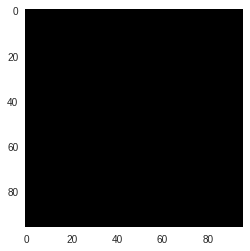

In [0]:
im = Image.open("/content/train/9369c7278ec8bcc6c880d99194de09fc2bd4efbe.tif")
plt.imshow(im)
plt.grid(False)

In [0]:
#image is black
df_data[df_data['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']

#causes a training error
df_data[df_data['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']

### Bar Graph Displaying the distribution of Classes

Number Of Images having no Cancer: 130908
Number of Images having Cancer: 89117


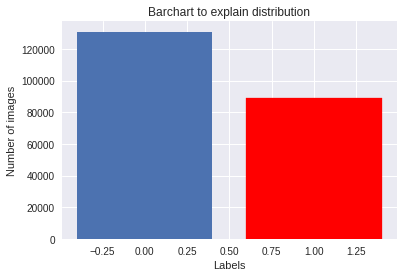

<Figure size 432x288 with 0 Axes>

In [0]:
count = [len(df_data[df_data['label']== 0]),len(df_data[df_data['label']== 1])]
print('Number Of Images having no Cancer: '+str(count[0])+'\nNumber of Images having Cancer: '+str(count[1]))
barchart = plt.bar(range(2),count,width=0.8)
barchart[1].set_color('r')
plt.xlabel('Labels')
plt.ylabel('Number of images')
# plt.legend(['Label 0','Label 1'],loc='best')
plt.title('Barchart to explain distribution')
plt.show()
plt.savefig('class-distribution.jpg')

### Displaying few images from both the classes

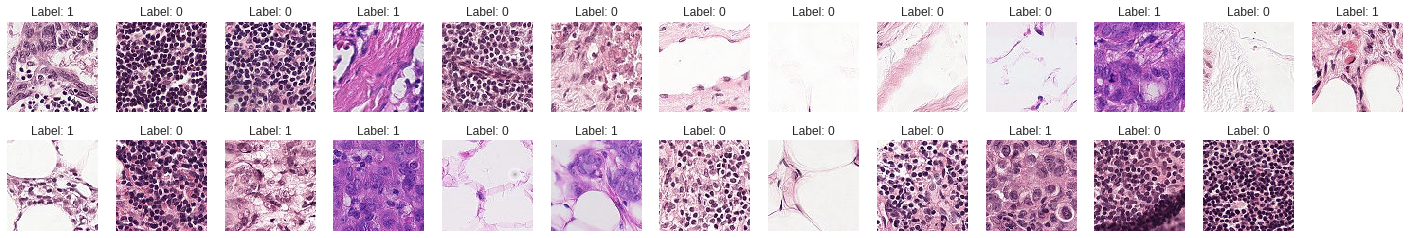

In [0]:
labels = pd.read_csv('/content/train_labels.csv.zip')
fig = plt.figure(figsize=(25, 4))
train_imgs = os.listdir("/content/train")
for idx, img in enumerate(np.random.choice(train_imgs, 25)):
    ax = fig.add_subplot(2, 26//2, idx+1, xticks=[], yticks=[])
    im = Image.open("/content/train/" + img)
    plt.imshow(im)
    lab = labels.loc[labels['id'] == img.split('.')[0], 'label'].values[0]
    ax.set_title(f'Label: {lab}')

### Splitting Data (Test Size is 10% of Training Set and used Stratified sampling)

In [0]:
y = df_data['label']

df_train, df_val = train_test_split(df_data, test_size=0.10, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)



(198022, 2)
(22003, 2)


In [0]:
df_val.head

<bound method NDFrame.head of                                               id  label
79961   0d8c9abf388785a016d72e609ab932b7e134f827      0
45724   5566aa9c1d698535c449144d72e98556bf77fd47      0
81384   358c0ab1962f8f1c202b146d88b35f55252bde9f      1
91989   00f81cefedcc1fb79a5c500677aad14438c50296      0
177529  e7a806a270062e1bf77aed9be266953d11e25bd6      0
29462   90c0b721e0ce88e362a86642ba9ddd7b2c1c047b      0
60929   2b020aee5c02fd7cf92c0044d6699c81563343bb      0
124710  b85d30002e15c82f6acc3453bb1a2842f63a8060      1
52432   bf162c348a1920e4529cdca012bc34fc3c79e514      1
29994   4f64754e327f26830276935fd27f528ef27805ce      0
44508   db03874e86141696c257da6b12aae50d89e771cc      1
67382   2c0374ecec45a345bdadd6fb30009f505aa82546      0
95494   84ba1bdb2043bbc320f715b1e0536eb90f7aaae2      1
20142   093269adfd201ddfbe6948ec08544b3b77084b56      0
104163  95ff6de26600ee8407eb89d15ceec29ee463c63b      1
145498  be855a87249c43afb5074b79a7be023cc6aedac3      1
54082   88a5319e58

**Uncomment the next cell and run it only if you encounter error in the cell after it**

In [0]:
# shutil.rmtree('base_dir',ignore_errors=True)

### To prevent GPU from crashing, the following Directory structure was followed!

### `base_dir` has two directories `train_dir` and `val_dir`  and they both in turn have directories `a_no_tumor_tissue` and `b_has_tumor_tissue`

### This directory structure has been followed to help keras indexing images during processing of images

In [0]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_tumor_tissue
    # b_has_tumor_tissue

# val_dir
    # a_no_tumor_tissue
    # b_has_tumor_tissue



# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)



# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
no_tumor_tissue = os.path.join(train_dir, 'a_no_tumor_tissue')
os.mkdir(no_tumor_tissue)
has_tumor_tissue = os.path.join(train_dir, 'b_has_tumor_tissue')
os.mkdir(has_tumor_tissue)


# create new folders inside val_dir
no_tumor_tissue = os.path.join(val_dir, 'a_no_tumor_tissue')
os.mkdir(no_tumor_tissue)
has_tumor_tissue = os.path.join(val_dir, 'b_has_tumor_tissue')
os.mkdir(has_tumor_tissue)

In [0]:
# Set the id as the index in df_data
df_data.set_index('id', inplace=True)

### Copying images from `train` folder to respective folders

In [0]:
# Get a list of train and val images
train_list = list(df_train['id'])
val_list = list(df_val['id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image + '.tif'
    # get the label for a certain image
    target = df_data.loc[image,'label']
    
    # these must match the folder names
    if target == 0:
        label = 'a_no_tumor_tissue'
    if target == 1:
        label = 'b_has_tumor_tissue'
    
    # source path to image
    src = os.path.join('/content/train', fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image + '.tif'
    # get the label for a certain image
    target = df_data.loc[image,'label']
    
    # these must match the folder names
    if target == 0:
        label = 'a_no_tumor_tissue'
    if target == 1:
        label = 'b_has_tumor_tissue'
    

    # source path to image
    src = os.path.join('/content/train/', fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

### Using `ImageDataGenerator` API to preprocess images and splitting it to `training` and `validation` dataset

In [0]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

train_datagen = ImageDataGenerator(rescale=1.0/255,validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical',
                                        subset = 'training')

val_gen = train_datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical',
                                        subset='validation')

test_gen = test_datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 158418 images belonging to 2 classes.
Found 39604 images belonging to 2 classes.
Found 22003 images belonging to 2 classes.


### Defining the Sequential `Model`for training

In [0]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 92, 92, 32)        9248      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 41, 41, 64)        36928     
__________

### Compiling Model with ADaptive Momentum Optimizer and Starting Learning Rate 0.0001

In [0]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy',metrics=['accuracy'])

### Execute this to save model architecture as image

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model_arch.jpg', show_shapes=True,show_layer_names=True)

### ModelCheckpoint helps in saving model (weights) as a file on given various conditions, so that it can be uploaded later to directly predict. 
Here, model which results in `max val_acc`. i.e., when Validation Accuracy reaches maximum, is saved.

### ReduceLROnPlateau helps in reducing LR on various given conditions
Here, Learning Rate is reduced when for `2` epochs, the `val_acc` has stopped incerasing. i.e., if for 2 epochs, Validation accuracy doesn't increase, it reduces LR by a factor of 0.5. Hence preventing stagnation.

In [0]:
checkpoint = ModelCheckpoint("model.h5", monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=15, verbose=1,
                   callbacks=[checkpoint, reduce_lr])

Epoch 1/15
19803/19803 [==============================] - 888s 45ms/step - loss: 0.2752 - acc: 0.8861 - val_loss: 0.2841 - val_acc: 0.8865

Epoch 00001: val_acc improved from -inf to 0.88648, saving model to model.h5
Epoch 2/15
19803/19803 [==============================] - 877s 44ms/step - loss: 0.2493 - acc: 0.8998 - val_loss: 0.2491 - val_acc: 0.9003

Epoch 00002: val_acc improved from 0.88648 to 0.90032, saving model to model.h5
Epoch 3/15
19803/19803 [==============================] - 877s 44ms/step - loss: 0.2294 - acc: 0.9097 - val_loss: 0.2353 - val_acc: 0.9077

Epoch 00003: val_acc improved from 0.90032 to 0.90770, saving model to model.h5
Epoch 4/15
19803/19803 [==============================] - 878s 44ms/step - loss: 0.2174 - acc: 0.9146 - val_loss: 0.2371 - val_acc: 0.9009

Epoch 00004: val_acc did not improve from 0.90770
Epoch 5/15
19803/19803 [==============================] - 883s 45ms/step - loss: 0.2066 - acc: 0.9195 - val_loss: 0.2158 - val_acc: 0.9148

Epoch 00005: 

### Visualizing Training and Validation Accuracy

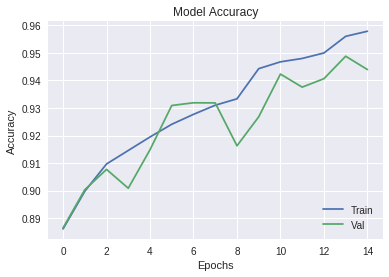

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Val'],loc='lower right')
plt.savefig('train-valid-acc.jpg')

### Visualizing Training and Validation Loss

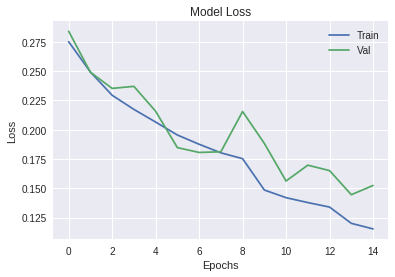

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train','Val'],loc='upper right')
plt.savefig('train-valid-loss.jpg')

### Evaluating the Model with Validation Data

In [0]:
model.load_weights('model.h5')
val_loss, val_acc = model.evaluate_generator(test_gen, 
                        steps=len(df_val))

print('Validation loss:', val_loss)
print('Validation Accuracy:', val_acc)

Validation loss: 0.14509425304303733
Validation Accuracy: 0.9489160569013316


### To explicitly save the model

In [0]:
model.save('model.h5')

### Prediction

In [0]:
# model = Sequential()
test_gen.reset()
model.load_weights('model.h5')
pred = model.predict_generator(test_gen, steps = test_gen.n//test_gen.batch_size, verbose = 1)


22003/22003 [==============================] - 89s 4ms/step


In [0]:
pred

array([[9.9826968e-01, 1.7302515e-03],
       [9.9998999e-01, 1.0000541e-05],
       [9.9993575e-01, 6.4249172e-05],
       ...,
       [3.2085118e-06, 9.9999678e-01],
       [1.8723778e-01, 8.1276220e-01],
       [4.1079845e-02, 9.5892018e-01]], dtype=float32)

### Receiving Operating Characteristic (ROC) Score and Area Under the Curve


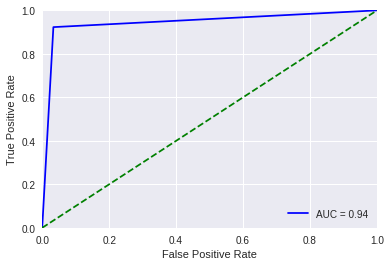

<Figure size 432x288 with 0 Axes>

In [0]:
fpr,tpr,threshold = roc_curve(test_gen.classes,pred.argmax(1))
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig('auc-curve.jpg')

### Confusion Martix

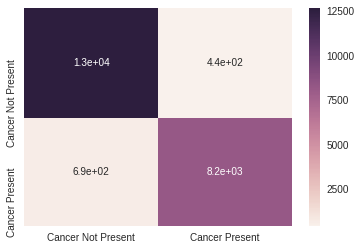

In [0]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as mticker
cm = confusion_matrix(test_gen.classes, pred.argmax(1).tolist())
ylabels = ['Cancer Not Present','Cancer Present']
ax = sn.heatmap(cm,annot=True,xticklabels=ylabels,yticklabels=ylabels)
ax.figure.savefig('cm.jpg')

### Log Loss

In [0]:
log_loss(test_gen.classes,pred.argmax(1))

1.7643927688022822

In [0]:
np.round(pred).astype('int32') #Converting probabilities to classes

In [0]:
count = 0
for i in range(len(pred)):
  if pred.argmax(1).tolist()[i] == test_gen.classes.flatten()[i]:
    count+=1
    
print(str(100*(count/len(pred)))+"%")

94.89160569013316%


### Precision, Recall, F-Score, Support Score for both the labels

In [0]:
from sklearn.metrics import precision_recall_fscore_support
prfs = precision_recall_fscore_support(test_gen.classes,pred.argmax(1))
print('Precision for Label 0: ')
print(prfs[0][0])
print('Precision for Label 1: ')
print(prfs[0][1])
print('Recall for Label 0:')
print(prfs[1][0])
print('Recall for Label 1:')
print(prfs[1][1])
print('F Score for Label 0:')
print(prfs[2][0])
print('F Score for Label 1:')
print(prfs[2][1])
print('Support for Label 0:')
print(prfs[3][0])
print('Support for Label 1:')
print(prfs[3][1])

Precision for Label 0: 
0.9485046098493366
Precision for Label 1: 
0.9495497575617641
Recall for Label 0:
0.9666182873730044
Recall for Label 1:
0.9229129263913824
F Score for Label 0:
0.9574757869249394
F Score for Label 1:
0.9360418800500739
Support for Label 0:
13091
Support for Label 1:
8912


### Graph Showing values for Precision, Recall ad F-Score

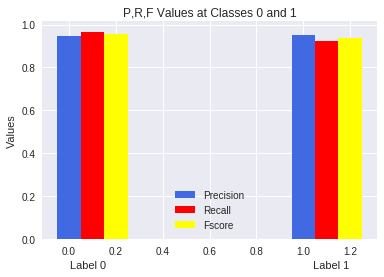

<Figure size 432x288 with 0 Axes>

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
bars = np.arange(2)
width = 0.1
p = ax.bar(bars,prfs[0],width,color = 'royalblue')
r = ax.bar(bars+width,prfs[1],width,color = 'red')
f = ax.bar(bars+width*2,prfs[2],width,color = 'yellow')
ax.set_ylabel('Values')
ax.set_xlabel('Label 0                                                                     Label 1')
ax.set_title('P,R,F Values at Classes 0 and 1')
ax.legend((p[0],r[0],f[0]),('Precision','Recall','Fscore'))
plt.show()
plt.savefig('prf.jpg')

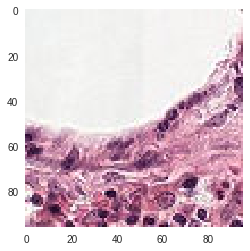

In [0]:
import imageio as im
import matplotlib.image as mpimg
from keras.preprocessing import image
# img = image.load_img('/content/train/84ba1bdb2043bbc320f715b1e0536eb90f7aaae2.tif')
img = image.load_img('/content/train/0d8c9abf388785a016d72e609ab932b7e134f827.tif')
img_arr = image.img_to_array(img)
img = np.expand_dims(img_arr,axis = 0)
img = img/255
 
plt.imshow(img[0])
plt.grid(False)
plt.show()


To Predict Individual Images

In [0]:
images = np.vstack([img])
classes = model.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [1]


### Visualizing the output after 4 layers activation (Beta!)

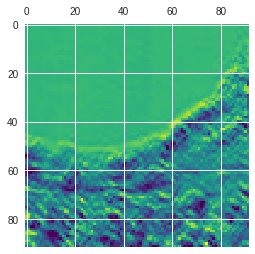

In [0]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img)
first_layer_activation = activations[1]
# print(first_layer_activation)
# plt.grid(False)
plt.matshow(first_layer_activation[0,:,:,4],cmap='viridis')
plt.savefig('activation.jpg')